In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
#%matplotlib qt5
#%matplotlib
#%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [ ]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

In [4]:
from LayerModel5 import *

In [5]:
from frame import *

In [6]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [ ]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [ ]:
dt_df.tail()

In [ ]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [7]:
dt_df = pd.read_csv('data_csv\\603799.XSHG.csv',index_col=0,parse_dates=True)

In [8]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [9]:
dt_df.head()

,total_turnover,high,close,open,volume,low,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,23049694.0,23.1326,23.0176,23.0560,995930.0,23.0100,0
2019-01-02 09:40:00,16118445.0,23.0406,22.9640,23.0176,698906.0,22.9103,1
2019-01-02 09:45:00,13180271.0,23.0560,22.9870,22.9640,570908.0,22.9563,2
2019-01-02 09:50:00,18621408.0,23.0560,23.0560,22.9870,807439.0,22.9180,3
2019-01-02 09:55:00,14496614.0,23.1863,23.0176,23.0560,625118.0,23.0023,4


## get data list

In [10]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [ ]:
idx.shape

In [ ]:
idx.head()

### Find Market Open

In [ ]:
idx['internal'] = idx['datetime'].diff()

In [ ]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

In [ ]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

### Get 属性数据

In [11]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.lv_L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.lv_L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [12]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [13]:
m = Market(4)
Stick.mm = m
Trend.m = m
Pair.m = m
PairChain.m = m
Signal001.m = m
Signal001.ef = ef

In [14]:
Signal001.L = m.SIG_L
Signal001()

SIG0010-0(TmS:0, 0, 0, 0)

In [15]:
Stick.lv_L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))

In [16]:
TrendLv1 = type('TrendLv1', (Trend,), {'lv_L':m.Lv1_L, 'ML':Stick.lv_L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'lv_L':m.Lv2_L, 'ML':TrendLv1.lv_L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'lv_L':m.Lv3_L, 'ML':TrendLv2.lv_L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 23.055999999999997, 0))

In [17]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv0.regSignal()
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv1.regSignal()
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv2.regSignal()
PairChainLv3 = PairChain(3, 'PairChainLv3')


In [ ]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [ ]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
'''PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()
'''

In [18]:
m.__dict__

{'layer': 4,
 'TmIdx': 0,
 'obj_list': {'st': [[Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))],
   [Trend1(0, 0, Point(0.0, 23.055999999999997, 0))],
   [Trend2(0, 0, Point(0.0, 23.055999999999997, 0))],
   [Trend3(0, 0, Point(0.0, 23.055999999999997, 0))],
   []],
  'pair': [[Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   []],
  'pairchain': [[<LayerModel5.PairChain at 0x17363b00>],
   []],
  'mergedpair': [[], [], [], [], []],
  'pattern01': [[], [], [], [], []]},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))],
 'PLv0_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv0_L': [<LayerModel5.PairChain at 0x17363b00>],
 'MPLv0_L': [],
 'PT01Lv0_L': [],
 'Lv1_L': [Trend1(0, 0, Point(0.0, 23.055999999999997, 0))],
 'PLv1_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv1_L': [<LayerModel5.PairChain at 0x177ea748>],
 'MPLv1_L': [],
 'PT01Lv1_L': [],
 'Lv2_L': [Trend2(0, 0, Point(0.0, 23.055999999999997, 0))],
 'PLv2_L':

In [19]:
ef.event_config

[{'level': 0,
  'Stick': {'NEW': {'method': ['update2',
     'update2',
     'distr',
     'distr',
     'updateAll'],
    'obj_p': ['m.Lv1_L[-1]',
     'm.PCLv0_L[0]',
     'm.PLv0_L[-1]',
     'm.PLv1_L[-1]',
     'm.SIG_L[-1]'],
    'param': ['', '', '', '', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': [], 'obj_p': [], 'param': []}}},
 {'level': 1,
  'TrendLv1': {'NEW': {'method': ['update2', 'update2', 'distr', 'distr'],
    'obj_p': ['m.Lv2_L[-1]', 'm.PCLv1_L[0]', 'm.PLv1_L[-1]', 'm.PLv2_L[-1]'],
    'param': ['', '', '', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv1_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv2_L[-1]'],

In [20]:
Position.m = m
Position.L = m.position

In [21]:
time_start=time.time()
main()
time_end=time.time()
print('totally cost：',time_end-time_start)

TmIdx:5.0,[[<frame.Event object at 0x0000000017363EB8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9.0,[[<frame.Event object at 0x00000000176B2780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0]
Lv1.update2(): flag:0, treated.status:0,treaded.drt:1,treated.mp:[0, 1]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
Not Prepared!!!!
TmIdx:10.0,[[<frame.Event object at 0x00000000176B2320>]]
(0, PairChainLv0, NEW)
TmIdx:12.0,[[<frame.Event object at 0x00000000176B2BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13.0,[[<frame.Event object at 0x00000000176B29B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14.0,[[<frame.Event object at 0x00000000176B2518>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18.0,[[<frame.Event object at 0x00000000176B2208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19.0,[[<frame.Event object at 0x0000000

TmIdx:278.0,[[<frame.Event object at 0x00000000178207F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[34, 35, 36, 37, 38]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (271.0, 22.941, -1)),peak(264.0, 22.849, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[34, 35, 36, 37, 38, 39]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:279.0,[[<frame.Event object at 0x00000000178200F0>]]
(0, PairChainLv0, NEW)
TmIdx:280.0,[[<frame.Event object at 0x00000000178209B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[34, 35, 36, 37, 38, 39]
Lv1.upd1st():case1, status:1, mp:[34, 35, 36, 37, 38, 39, 40],pp:5
Lv1.produceNewTrend:case1, mp=[39, 40]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[39, 40]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr(

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:446.0,[[<frame.Event object at 0x0000000017830CF8>]]
(0, PairChainLv0, NEW)
TmIdx:448.0,[[<frame.Event object at 0x0000000017830DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[61, 62, 63, 64, 65, 66, 67, 68, 69]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (443.0, 22.3814, 1)),peak(437.0, 22.3891, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:449.0,[[<frame.Event object at 0x0000000017830C88>]]
(0, PairChainLv0, NEW)
TmIdx:451.0,[[<frame.Event object at 0x0000000017830E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
Lv1.update2(): flag:1, treated.

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[91, 92]
Lv1.upd1st():case1, status:1, mp:[91, 92, 93],pp:1
Lv1.produceNewTrend:case1, mp=[92, 93]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[92, 93]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:637.0,[[<frame.Event object at 0x0000000017847A58>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[19, 20, 21, 22, 23, 24, 25]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (606.0, 22.5041, 1)),peak(572.0, 22.0902, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[19, 20, 21, 22, 23, 24, 25, 26]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:638.0,[[<frame.Event object at 0x0000000017847EB8>, <frame.Event object at 0x00000000178479B0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:640.0,[[<frame.Event objec

m.SIG_L[-1].updateAll()
New SIG!!!
True
TmIdx:777.0,[[<frame.Event object at 0x000000001785BE10>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[27, 28, 29, 30, 31, 32]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[27, 28, 29, 30, 31, 32, 33]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:778.0,[[<frame.Event object at 0x00000000178690B8>]]
(0, PairChainLv0, NEW)
TmIdx:778.0,[[<frame.Event object at 0x0000000017869128>]]
(1, PairChainLv1, NEW)
TmIdx:781.0,[[<frame.Event object at 0x0000000017869208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[119, 120]
Lv1.update1st:status=0,mp:3,(767.0, 22.8413, -1),(770.0, 22.688000000000002, -1),(781.0, 22.5271, 1),[StdK(774.0, 22.756999999999998, 22.4811, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (776.0, 22.756999999999998, -1)),peak(770.0, 22.688000000000002, -1),drt:-1
L

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[131, 132, 133, 134, 135, 136, 137, 138, 139]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (929.0, 20.6262, 1)),peak(918.0, 19.8674, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:933.0,[[<frame.Event object at 0x00000000178771D0>]]
(0, PairChainLv0, NEW)
TmIdx:935.0,[[<frame.Event object at 0x0000000017877400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
Lv1.upd1st():case1, status:1, mp:[131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141],pp:7
Lv1.produceNewTrend:case1, mp=[138, 139, 140, 141]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (927.0, 20.7948, -1)),peak(928.0, 20.6645, 1),drt:1
Tren

m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:1103.0,[[<frame.Event object at 0x0000000017892828>]]
(0, PairChainLv0, NEW)
TmIdx:1107.0,[[<frame.Event object at 0x00000000178927F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[158, 159, 160, 161, 162, 163, 164, 165, 166, 167]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:1107.0,[[<frame.Event object at 0x0000000017892710>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1108.0,[[<frame.Event object at 0x0000000017892AC8>]]
(0, PairChainLv0, NEW)
TmIdx:1109.0,[[<frame.Event object at 0x0000000017892B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 16

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1267.0, 24.1137, -1)),peak(1260.0, 24.0754, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[188, 189, 190, 191]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:1281.0,[[<frame.Event object at 0x00000000178AA8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[188, 189, 190, 191]
Lv1.upd1st():case1, status:1, mp:[188, 189, 190, 191, 192],pp:3
Lv1.produceNewTrend:case1, mp=[191, 192]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[191, 192]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:1281.0,[[<frame.Event object at 0x00000000178AA748>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[42, 43, 44, 45, 46, 47, 48]
TrendLv2.updatedPeakP(st_i

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1440.0,[[<frame.Event object at 0x00000000178BFA58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1441.0,[[<frame.Event object at 0x00000000178BF898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1442.0,[[<frame.Event object at 0x00000000178BF828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1443.0,[[<frame.Event object at 0x00000000178BFB00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1444.0,[[<frame.Event object at 0x00000000178BF710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1445.0,[[<frame.Event object at 0x00000000178BFA90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1446.0,[[<frame.Event object at 0x00000000178BFB38>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1448.0,[[<frame.Event object at 0x00000000178BFCF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[211, 212, 213, 214, 215, 216, 217, 218]
Lv1.upd1st(

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[240, 241, 242, 243]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[240, 241, 242, 243, 244]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:1579.0,[[<frame.Event object at 0x00000000178D6B70>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1580.0,[[<frame.Event object at 0x00000000178D6D68>]]
(0, PairChainLv0, NEW)
TmIdx:1581.0,[[<frame.Event object at 0x00000000178D6BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[240, 241, 242, 243, 244]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1577.0, 26.3442, -1)),peak(1566.0, 25.892, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[240, 241, 242, 243, 244, 245]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:1

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1723.0,[[<frame.Event object at 0x00000000178F0D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1720.0, 29.1342, 1)),peak(1715.0, 29.0499, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:1725.0,[[<frame.Event object at 0x00000000178F0EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.

m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1880.0,[[<frame.Event object at 0x000000001790AD68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[290, 291, 292, 293, 294, 295, 296, 297]
Lv1.upd1st():case1, status:1, mp:[290, 291, 292, 293, 294, 295, 296, 297, 298],pp:5
Lv1.produceNewTrend:case1, mp=[295, 296, 297, 298]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1854.0, 30.031, 1)),peak(1852.0, 30.4142, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1859.0, 30.3836, -1)),peak(1854.0, 30.031, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1872.0, 28.659000000000002, 1)),peak(1854.0, 30.031, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[295, 296, 297, 298]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:1880.0,[[<frame.Event object at 0x00

(2, PairChainLv2, NEW)
TmIdx:2009.0,[[<frame.Event object at 0x0000000017919C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2010.0,[[<frame.Event object at 0x000000001791F128>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2018.0,[[<frame.Event object at 0x000000001791F550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[315, 316, 317, 318, 319, 320]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[315, 316, 317, 318, 319, 320, 321]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
New SIG!!!
True
TmIdx:2018.0,[[<frame.Event object at 0x000000001791F128>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2019.0,[[<frame.Event object at 0x000000001791F710>]]
(0, PairChainLv0, NEW)
TmIdx:2022.0,[[<frame.Event object at 0x000000001791F780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[3

TmIdx:2089.0,[[<frame.Event object at 0x0000000017922668>]]
(0, PairChainLv0, NEW)
TmIdx:2089.0,[[<frame.Event object at 0x0000000017922828>]]
(1, PairChainLv1, NEW)
TmIdx:2089.0,[[<frame.Event object at 0x0000000017922550>]]
(2, PairChainLv2, NEW)
TmIdx:2093.0,[[<frame.Event object at 0x0000000017922710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[330, 331, 332, 333]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[330, 331, 332, 333, 334]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
New SIG!!!
True
TmIdx:2093.0,[[<frame.Event object at 0x0000000017922400>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2094.0,[[<frame.Event object at 0x00000000179229E8>]]
(0, PairChainLv0, NEW)
TmIdx:2095.0,[[<frame.Event object at 0x0000000017922A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[330, 331, 332, 333,

m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:2233.0,[[<frame.Event object at 0x0000000017947390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[350, 351, 352, 353, 354]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2225.0, 30.6595, -1)),peak(2218.0, 30.7745, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[350, 351, 352, 353, 354, 355]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:2234.0,[[<frame.Event object at 0x0000000017947160>]]
(0, PairChainLv0, NEW)
TmIdx:2238.0,[[<frame.Event object at 0x0000000017947518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[350, 351, 352, 353, 354, 355]
Lv1.upd1st():case1, status:1, mp:[350, 351, 352, 353, 354, 355, 356],pp:3
Lv1.produceNewTrend:case1, mp=[353, 354, 355, 356]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2222.0, 30

m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:2303.0,[[<frame.Event object at 0x0000000017945F98>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[76, 77, 78, 79, 80, 81, 82, 83, 84, 85]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:2306.0,[[<frame.Event object at 0x000000001794D748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[368, 369, 370, 371]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[368, 369, 370, 371, 372]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:2306.0,[[<frame.Event object at 0x000000001794D828>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2307.0,[[<frame.Event object at 0x000000001794D908>, <frame.Event object at 0x000000001794D6A0>]]


m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:2427.0,[[<frame.Event object at 0x00000000179610F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2428.0,[[<frame.Event object at 0x00000000179614E0>]]
(0, PairChainLv0, NEW)
TmIdx:2431.0,[[<frame.Event object at 0x0000000017961550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2423.0, 29.893, 1)),peak(2407.0, 30.6748, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:2432.0,[[<frame.Event object at 0x0000000017961470>, <frame.Event object at 0x00000000179616A0

m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:2489.0,[[<frame.Event object at 0x00000000179649B0>]]
(1, PairChainLv1, NEW)
TmIdx:2491.0,[[<frame.Event object at 0x0000000017964CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[397, 398, 399, 400, 401, 402]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[397, 398, 399, 400, 401, 402, 403]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:2491.0,[[<frame.Event object at 0x0000000017964B00>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2497.0,[[<frame.Event object at 0x0000000017964EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[397, 398, 399, 400, 401, 402, 403]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2490.0, 30.3989, 1)),peak(2467.0, 30.191999999999997, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,tr

m.SIG_L[-1].updateAll()
TmIdx:2655.0,[[<frame.Event object at 0x000000001797EA20>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2656.0,[[<frame.Event object at 0x000000001797ECF8>]]
(0, PairChainLv0, NEW)
TmIdx:2657.0,[[<frame.Event object at 0x000000001797E978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2658.0,[[<frame.Event object at 0x000000001797E9B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2659.0,[[<frame.Event object at 0x000000001797EC18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2662.0,[[<frame.Event object at 0x000000001797E908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2664.0,[[<frame.Event object at 0x000000001797EBA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2665.0,[[<frame.Event object at 0x000000001797EC50>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2667.0,[[<frame.Event object at 0x000000001797EE80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, tr

m.SIG_L[-1].updateAll()
TmIdx:2827.0,[[<frame.Event object at 0x00000000179977B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2828.0,[[<frame.Event object at 0x0000000017997AC8>]]
(0, PairChainLv0, NEW)
TmIdx:2835.0,[[<frame.Event object at 0x0000000017997BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2826.0, 30.8511, -1)),peak(2811.0, 31.2727, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:2836.0,[[<frame.Event object at 0x0000000017997A58>]]
(0, PairChainLv0, NEW)
TmIdx:2838.0,[[<frame.Event object at 0x0000000017997C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag

m.SIG_L[-1].updateAll()
TmIdx:2988.0,[[<frame.Event object at 0x00000000179A9E48>]]
(0, PairChainLv0, NEW)
TmIdx:2989.0,[[<frame.Event object at 0x00000000179B8198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[479, 480, 481, 482]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[479, 480, 481, 482, 483]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:2989.0,[[<frame.Event object at 0x00000000179B80F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2990.0,[[<frame.Event object at 0x00000000179B8400>]]
(0, PairChainLv0, NEW)
TmIdx:2991.0,[[<frame.Event object at 0x00000000179B8470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[479, 480, 481, 482, 483]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2988.0, 33.051, 1)),peak(2978.0, 32.3458, 1),drt:-1
Lv1.update2(): flag:0, treated.sta

m.SIG_L[-1].updateAll()
TmIdx:3538.0,[[<frame.Event object at 0x00000000179BCB38>]]
(0, PairChainLv0, NEW)
TmIdx:3543.0,[[<frame.Event object at 0x00000000179BCD68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502]
Lv1.upd1st():case1, status:1, mp:[479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503],pp:21
Lv1.produceNewTrend:case1, mp=[500, 501, 502, 503]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3527.0, 28.1914, -1)),peak(3529.0, 28.0688, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3530.0, 28.0611, 1)),peak(3527.0, 28.1914, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3536.0, 28.6207, -1)),peak(3527.0, 28.1914, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEA

m.SIG_L[-1].updateAll()
TmIdx:3685.0,[[<frame.Event object at 0x00000000179DC400>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[101, 102, 103, 104, 105]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (3662.0, 26.1449, 1)),peak(3664.0, 26.2829, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[101, 102, 103, 104, 105, 106]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:3686.0,[[<frame.Event object at 0x00000000179DC8D0>, <frame.Event object at 0x00000000179DC978>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3686.0,[[<frame.Event object at 0x00000000179DC9B0>]]
(1, PairChainLv1, NEW)
TmIdx:3687.0,[[<frame.Event object at 0x00000000179DCA58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3688.0,[[<frame.Event object at 0x00000000179DC358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1]

m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:3850.0,[[<frame.Event object at 0x00000000179DFF98>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[101, 102, 103, 104, 105, 106, 107]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (3829.0, 20.3886, 1)),peak(3835.0, 20.9941, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[101, 102, 103, 104, 105, 106, 107, 108]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:3851.0,[[<frame.Event object at 0x00000000179EC400>]]
(0, PairChainLv0, NEW)
TmIdx:3851.0,[[<frame.Event object at 0x00000000179EC4E0>]]
(1, PairChainLv1, NEW)
TmIdx:3852.0,[[<frame.Event object at 0x00000000179EC4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[540, 541, 542, 543]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[540, 5

m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:3945.0,[[<frame.Event object at 0x00000000179F9B00>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
Lv2.upd1st():case1, status:1, mp:[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113],pp:7
Lv2.produceNewTrend:case1, mp=[108, 109, 110, 111, 112, 113]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (3851.0, 21.8372, -1)),peak(3874.0, 21.408, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (3868.0, 21.1704, 1)),peak(3851.0, 21.8372, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (3885.0, 21.7606, -1)),peak(3851.0, 21.8372, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (3891.0, 21.3697, 1)),peak(3851.0, 21.8372, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (3926.0, 22.0212, -1)),peak(3851.0, 21.8372, -1),drt:1
Trend

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[565, 566, 567, 568]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[568, 569]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:4005.0,[[<frame.Event object at 0x0000000017A01358>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[108, 109, 110, 111, 112, 113, 114, 115]
Lv2.upd1st():case1, status:1, mp:[108, 109, 110, 111, 112, 113, 114, 115, 116],pp:5
Lv2.produceNewTrend:case1, mp=[113, 114, 115, 116]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (3951.0, 21.0401, 1)),peak(3968.0, 21.1781, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (3963.0, 21.316, -1)),peak(3951.0, 21.0401, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (3982.0, 20.7412, 1)),peak(3951.0, 21.0401, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated

TmIdx:4147.0,[[<frame.Event object at 0x0000000017A1F438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[585, 586, 587, 588, 589, 590, 591]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4139.0, 21.1474, 1)),peak(4125.0, 20.8638, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[585, 586, 587, 588, 589, 590, 591, 592]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:4148.0,[[<frame.Event object at 0x0000000017A1F358>]]
(0, PairChainLv0, NEW)
TmIdx:4151.0,[[<frame.Event object at 0x0000000017A1F588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[585, 586, 587, 588, 589, 590, 591, 592]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[585, 586, 587, 588, 589, 590, 591, 592, 593]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:4152.0,[[

m.SIG_L[-1].updateAll()
TmIdx:4302.0,[[<frame.Event object at 0x0000000017A2BD68>]]
(0, PairChainLv0, NEW)
TmIdx:4303.0,[[<frame.Event object at 0x0000000017A2BF98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4305.0,[[<frame.Event object at 0x0000000017A2BB00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4306.0,[[<frame.Event object at 0x0000000017A2B630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4307.0,[[<frame.Event object at 0x0000000017A2BE10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4308.0,[[<frame.Event object at 0x0000000017A2BD68>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4311.0,[[<frame.Event object at 0x0000000017A25160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[610, 611, 612, 613, 614, 615]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[610, 611, 612, 613, 614, 615, 616]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.S

m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:4366.0,[[<frame.Event object at 0x0000000017A2BAC8>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4367.0,[[<frame.Event object at 0x0000000017A359B0>]]
(0, PairChainLv0, NEW)
TmIdx:4369.0,[[<frame.Event object at 0x0000000017A35A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[623, 624, 625, 626]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[623, 624, 625, 626, 627]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:4369.0,[[<frame.Event object at 0x0000000017A357F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4370.0,[[<frame.Event object at 0x0000000017A35CC0>]]
(0, PairChainLv0, NEW)
TmIdx:4371.0,[[<frame.Event object at 0x0000000017A35898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4372.0,[[<frame.Event object at 0x0000000017A35978>]]
(0, Stick, PEAK)
m.PCLv0_L[0

m.SIG_L[-1].updateAll()
New SIG!!!
True
TmIdx:4461.0,[[<frame.Event object at 0x0000000017A437F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4462.0,[[<frame.Event object at 0x0000000017A43B00>]]
(0, PairChainLv0, NEW)
TmIdx:4464.0,[[<frame.Event object at 0x0000000017A43BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4460.0, 20.1663, 1)),peak(4453.0, 20.2506, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:4465.0,[[<frame.Event object at 0x0000000017A43A90>, <frame.Event object at 0x0

m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:4634.0,[[<frame.Event object at 0x0000000017A59A58>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4635.0,[[<frame.Event object at 0x0000000017A59E48>]]
(0, PairChainLv0, NEW)
TmIdx:4636.0,[[<frame.Event object at 0x0000000017A59940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[666, 667, 668]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4633.0, 21.0171, -1)),peak(4628.0, 21.0018, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[666, 667, 668, 669]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:4638.0,[[<frame.Event object at 0x0000000017A59A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[666, 667, 668, 669]
Lv1.update2(): flag:0, treated.status:1,tr

m.SIG_L[-1].updateAll()
TmIdx:4803.0,[[<frame.Event object at 0x0000000017A7F438>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (4785.0, 21.1781, -1)),peak(4708.0, 22.5271, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:4804.0,[[<frame.Event object at 0x0000000017A7F828>]]
(0, PairChainLv0, NEW)
TmIdx:4804.0,[[<frame.Event object at 0x0000000017A7F630>]]
(1, PairChainLv1, NEW)
TmIdx:4809.0,[[<frame.Event object at 0x0000000017A7F8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[699, 700, 701, 702]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[702, 703]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()

m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:4937.0,[[<frame.Event object at 0x0000000017A8F978>]]
(0, PairChainLv0, NEW)
TmIdx:4939.0,[[<frame.Event object at 0x0000000017A8F940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[715, 716, 717, 718, 719, 720]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[715, 716, 717, 718, 719, 720, 721]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:4939.0,[[<frame.Event object at 0x0000000017A8F828>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4940.0,[[<frame.Event object at 0x0000000017A8FBE0>]]
(0, PairChainLv0, NEW)
TmIdx:4946.0,[[<frame.Event object at 0x0000000017A8FCF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[715, 716, 717, 718, 719, 720, 721]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4938.0, 19.6604, 1)),peak(4931.0, 1

m.SIG_L[-1].updateAll()
TmIdx:5114.0,[[<frame.Event object at 0x0000000017AA58D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5103.0, 21.28, 1)),peak(5088.0, 21.13, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:5119.0,[[<frame.Event object at 0x0000000017AA5A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744]
Lv1.upd1st():case1, status:1, mp:[733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745],pp:7
Lv1.produceNewTrend:case1, mp=[740, 741, 742, 743, 744, 745]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt

m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:5304.0,[[<frame.Event object at 0x0000000017AC84A8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5305.0,[[<frame.Event object at 0x0000000017AC8668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5306.0,[[<frame.Event object at 0x0000000017AC8908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5307.0,[[<frame.Event object at 0x0000000017AC8CC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5309.0,[[<frame.Event object at 0x0000000017AC8D30>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5318.0,[[<frame.Event object at 0x0000000017AC8F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[774, 775, 776, 777, 778, 779, 780]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5307.0, 21.44, -1)),peak(5280.0, 21.51, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[774, 775, 

Lv1.upd1st():case1, status:1, mp:[792, 793, 794, 795, 796, 797, 798, 799, 800],pp:1
Lv1.produceNewTrend:case1, mp=[793, 794, 795, 796, 797, 798, 799, 800]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5432.0, 21.58, 1)),peak(5430.0, 21.76, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5438.0, 21.75, -1)),peak(5432.0, 21.58, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5447.0, 21.55, 1)),peak(5432.0, 21.58, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5452.0, 21.93, -1)),peak(5447.0, 21.55, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5457.0, 21.65, 1)),peak(5447.0, 21.55, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5462.0, 21.84, -1)),peak(5447.0, 21.55, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5491.0, 21.06, 1)),peak(5447.0, 21.55, 1),d

m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:5660.0,[[<frame.Event object at 0x0000000017AFF2B0>, <frame.Event object at 0x0000000017AFF518>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5663.0,[[<frame.Event object at 0x0000000017AFF588>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5664.0,[[<frame.Event object at 0x0000000017AFF0B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5665.0,[[<frame.Event object at 0x0000000017AFF0F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5670.0,[[<frame.Event object at 0x0000000017AFF6D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[825, 826, 827, 828, 829, 830]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[830, 831]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:5670.0,[[<frame.Event object at 0x0000000017AFF0F0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].

(1, PairChainLv1, NEW)
TmIdx:5829.0,[[<frame.Event object at 0x0000000017B15278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[849, 850, 851, 852]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[849, 850, 851, 852, 853]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:5829.0,[[<frame.Event object at 0x0000000017B150B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5830.0,[[<frame.Event object at 0x0000000017B152E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5832.0,[[<frame.Event object at 0x0000000017B15358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5834.0,[[<frame.Event object at 0x0000000017B15320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5835.0,[[<frame.Event object at 0x0000000017B15198>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5842.0,[[<frame.Event object at 0x0000000017B15668>]]
(0, St

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[872, 873, 874, 875, 876]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5992.0, 21.76, -1)),peak(5983.0, 21.57, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[872, 873, 874, 875, 876, 877]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:6005.0,[[<frame.Event object at 0x0000000017B31320>]]
(0, PairChainLv0, NEW)
TmIdx:6009.0,[[<frame.Event object at 0x0000000017B31128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[872, 873, 874, 875, 876, 877]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[877, 878]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:6009.0,[[<frame.Event object at 0x0000000017B31240>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update

m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:6196.0,[[<frame.Event object at 0x0000000017B4A4E0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[173, 174, 175, 176, 177, 178, 179, 180, 181]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (6144.0, 20.76, 1)),peak(6086.0, 20.96, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[173, 174, 175, 176, 177, 178, 179, 180, 181, 182]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:6196.0,[[<frame.Event object at 0x0000000017B4A630>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6197.0,[[<frame.Event object at 0x0000000017B4A898>]]
(0, PairChainLv0, NEW)
TmIdx:6197.0,[[<frame.Event object at 0x000000001

Lv1.produceNewTrend:case1, mp=[928, 929, 930, 931]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6354.0, 21.32, -1)),peak(6355.0, 21.26, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6358.0, 21.25, 1)),peak(6354.0, 21.32, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6362.0, 21.38, -1)),peak(6354.0, 21.32, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[928, 929, 930, 931]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:6369.0,[[<frame.Event object at 0x0000000017B65400>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[183, 184, 185, 186, 187, 188, 189]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (6352.0, 21.23, 1)),peak(6335.0, 21.1, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[183, 184, 185, 186,

m.SIG_L[-1].updateAll()
TmIdx:6489.0,[[<frame.Event object at 0x0000000017B6AC50>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6490.0,[[<frame.Event object at 0x0000000017B72400>]]
(0, PairChainLv0, NEW)
TmIdx:6491.0,[[<frame.Event object at 0x0000000017B72470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6486.0, 20.85, -1)),peak(6391.0, 20.8, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:6492.0,[[<frame.Event object at 0x0000000017B72390>]]
(0, PairChainLv0, NEW)
TmIdx:6493.0,[[<frame.Event object at 0x0000000017B72550>]]
(0

TmIdx:6731.0,[[<frame.Event object at 0x0000000017B95128>]]
(0, PairChainLv0, NEW)
TmIdx:6732.0,[[<frame.Event object at 0x0000000017B953C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[973, 974, 975, 976, 977, 978, 979, 980]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[973, 974, 975, 976, 977, 978, 979, 980, 981]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:6732.0,[[<frame.Event object at 0x0000000017B952E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6734.0,[[<frame.Event object at 0x0000000017B955C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[973, 974, 975, 976, 977, 978, 979, 980, 981]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6731.0, 22.19, 1)),peak(6721.0, 22.04, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[973, 974, 975, 97

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:6932.0,[[<frame.Event object at 0x0000000017BAD978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6933.0,[[<frame.Event object at 0x0000000017BAB0B8>]]
(0, PairChainLv0, NEW)
TmIdx:6934.0,[[<frame.Event object at 0x0000000017BAB128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6930.0, 23.51, 1)),peak(6912.0, 23.02, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1001, 1002, 1003, 1004, 1005, 1

m.SIG_L[-1].updateAll()
TmIdx:7092.0,[[<frame.Event object at 0x0000000017BC0208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7089.0, 26.62, 1)),peak(7057.0, 26.38, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:7097.0,[[<frame.Event object at 0x0000000017BC03C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].dis

TmIdx:7254.0,[[<frame.Event object at 0x0000000017BDA5C0>]]
(0, PairChainLv0, NEW)
TmIdx:7255.0,[[<frame.Event object at 0x0000000017BDA668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1057, 1058, 1059, 1060]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1057, 1058, 1059, 1060, 1061]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:7255.0,[[<frame.Event object at 0x0000000017BD3F60>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7261.0,[[<frame.Event object at 0x0000000017BDA860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1057, 1058, 1059, 1060, 1061]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7254.0, 26.57, 1)),peak(7248.0, 26.0, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1057, 1058, 1059, 1060, 1061, 1062]
m.PCLv0_L[0].update2()
m.PLv

m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:7329.0,[[<frame.Event object at 0x0000000017BDF828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7321.0, 26.14, 1)),peak(7298.0, 26.1, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:7330.0,[[<frame.Event object at 0x0000000017BDFA20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7331.0,[[<frame.Event object at 0x0000000017BDFA90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7332.0,[[<frame.Event object at 0x0000000017BDF908>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7406.0, 26.91, 1)),peak(7407.0, 27.36, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7409.0, 27.26, -1)),peak(7406.0, 26.91, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7417.0, 26.72, 1)),peak(7406.0, 26.91, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1091, 1092, 1093, 1094]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:7420.0,[[<frame.Event object at 0x0000000017BE9DA0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:7420.0,

m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:7542.0,[[<frame.Event object at 0x0000000017BF8828>, <frame.Event object at 0x0000000017BF88D0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7543.0,[[<frame.Event object at 0x0000000017BF8908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7545.0,[[<frame.Event object at 0x0000000017BF8358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7548.0,[[<frame.Event object at 0x0000000017BF8588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1108, 1109, 1110, 1111]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1108, 1109, 1110, 1111, 1112]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:7548.0,[[<frame.Event object at 0x0000000017BF8358>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7549.0,[[<frame.Event object at 0x0000000017BF8AC8>]]
(0, PairChainLv0,

(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (7632.0, 24.23, 1)),peak(7593.0, 24.08, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:7643.0,[[<frame.Event object at 0x0000000017C045F8>]]
(1, PairChainLv1, NEW)
TmIdx:7646.0,[[<frame.Event object at 0x0000000017C047B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7647.0,[[<frame.Event object at 0x0000000017C04668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7651.0,[[<frame.Event object at 0x0000000017C04BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1122, 1123]
Lv1.update1st:st

m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:7796.0,[[<frame.Event object at 0x0000000017C17F28>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[225, 226, 227, 228, 229, 230]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[225, 226, 227, 228, 229, 230, 231]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:7796.0,[[<frame.Event object at 0x0000000017C1F160>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7800.0,[[<frame.Event object at 0x0000000017C1F320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1147, 1148]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1147, 1148, 1149]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:7801.0,[[<frame.Event object at 0x0000000017C1F550>]]
(0, PairChainLv0, NEW)
TmIdx:7805.0,[[<frame.Event obje

m.SIG_L[-1].updateAll()
TmIdx:7975.0,[[<frame.Event object at 0x0000000017E3A7F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7976.0,[[<frame.Event object at 0x0000000017E3AA58>]]
(0, PairChainLv0, NEW)
TmIdx:7980.0,[[<frame.Event object at 0x0000000017E3AB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1171, 1172, 1173, 1174, 1175, 1176, 1177]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7973.0, 25.92, 1)),peak(7953.0, 25.7, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:7984.0,[[<frame.Event object at 0x0000000017E3AC18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1201, 1202, 1203, 1204, 1205, 1206]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:8155.0,[[<frame.Event object at 0x0000000017E509B0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[239, 240, 241, 242, 243, 244]
Lv2.upd1st():case1, status:1, mp:[239, 240, 241, 242, 243, 244, 245],pp:1
Lv2.produceNewTrend:case1, mp=[240, 241, 242, 243, 244, 245]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (7996.0, 26.39, -1)),peak(8026.0, 26.08, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (8020.0, 25.8, 1)),peak(7996.0, 26.39, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (8033.0, 26.35, -1)),peak(7996.0, 26.39, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (8061.0, 25.71, 1)),peak(7996.0, 26.39, -1),drt:1
TrendLv2.updatedPea

m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:8258.0,[[<frame.Event object at 0x0000000017E60518>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[240, 241, 242, 243, 244, 245, 246, 247, 248]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (8223.0, 27.88, -1)),peak(8114.0, 28.77, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[240, 241, 242, 243, 244, 245, 246, 247, 248, 249]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:8263.0,[[<frame.Event object at 0x0000000017E60B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1221, 1222, 1223, 1224, 1225, 1226]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1226, 1227]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:8263.0,[[<frame.Event object at 0x0000000017E60978>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.

m.SIG_L[-1].updateAll()
TmIdx:8378.0,[[<frame.Event object at 0x0000000017E66FD0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8380.0,[[<frame.Event object at 0x0000000017E70630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1238, 1239, 1240, 1241, 1242]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8377.0, 26.53, -1)),peak(8369.0, 26.74, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1238, 1239, 1240, 1241, 1242, 1243]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:8381.0,[[<frame.Event object at 0x0000000017E705F8>]]
(0, PairChainLv0, NEW)
TmIdx:8386.0,[[<frame.Event object at 0x0000000017E70780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1238, 1239, 1240, 1241, 1242, 1243]
Lv1.upd1st():case1, status:1, mp:[1238, 1239, 1240, 1241, 1242, 1243, 1244],pp:3
Lv1.pr

m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:8469.0,[[<frame.Event object at 0x0000000017E7BCC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1255, 1256, 1257, 1258]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1255, 1256, 1257, 1258, 1259]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:8469.0,[[<frame.Event object at 0x0000000017E7B6D8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8476.0,[[<frame.Event object at 0x0000000017E7BF28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1255, 1256, 1257, 1258, 1259]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8468.0, 26.77, 1)),peak(8457.0, 26.81, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1255, 1256, 1257, 1258, 1259, 1260]
m.PCLv0_L[0].update2()

m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:8551.0,[[<frame.Event object at 0x0000000017E84A20>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[257, 258, 259, 260, 261, 262, 263]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (8539.0, 26.6, 1)),peak(8493.0, 26.47, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[257, 258, 259, 260, 261, 262, 263, 264]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:8552.0,[[<frame.Event object at 0x0000000017E8F048>]]
(1, PairChainLv1, NEW)
TmIdx:8553.0,[[<frame.Event object at 0x0000000017E8F0F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1272, 1273]
Lv1.update1st:status=0,mp:3,(8539.0, 26.6, 1),(8547.0, 27.07, 1),(8553.0, 26.97, -1),[StdK(8546.0, 27.28, 26.85, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8550.0, 26.85, 1)),peak(8547.0, 27.07, 1),drt:1
Lv1.

m.SIG_L[-1].updateAll()
TmIdx:8633.0,[[<frame.Event object at 0x0000000017E92B00>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8634.0,[[<frame.Event object at 0x0000000017E92E48>]]
(0, PairChainLv0, NEW)
TmIdx:8641.0,[[<frame.Event object at 0x0000000017E92F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8632.0, 29.12, -1)),peak(8624.0, 29.7, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:8642.0,[[<frame.Event object at 0x0000000017E970F0>]]
(0, PairChainLv0, NEW)
TmIdx:8643.0,[[<frame.Event object at 0x0000000017E970B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8806.0, 25.88, 1)),peak(8785.0, 25.13, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:8814.0,[[<frame.Event object at 0x0000000017EB7470>]]
(0, PairChainLv0, NEW)
TmIdx:8821.0,[[<frame.Event object at 0x0000000017EB7438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312]
Lv1.upd1st():case1, status:1, mp:[1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313],pp:7
Lv1.produceNewTrend:case1, mp=[1308, 1309, 1310, 1311, 1312, 1313]
TrendLv1.updatedPeakP(st_idx_in_ss):las

m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:8954.0,[[<frame.Event object at 0x0000000017EC6C88>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (8941.0, 24.61, 1)),peak(8942.0, 24.62, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:8955.0,[[<frame.Event object at 0x0000000017ECC080>, <frame.Event object at 0x0000000017EC6BA8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8956.0,[[<frame.Event object at 0x0000000017EC6DD8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8962.0,[[<frame.Event object at 0x0000000017ECC128>]]
(0, Stick, NEW)
m.Lv1_L[-1].

New SIG!!!
True
TmIdx:9161.0,[[<frame.Event object at 0x0000000017EE8550>]]
(0, PairChainLv0, NEW)
TmIdx:9167.0,[[<frame.Event object at 0x0000000017EE8518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:9167.0,[[<frame.Event object at 0x0000000017EE83C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9168.0,[[<frame.Event object at 0x0000000017EE87B8>]]
(0, PairChainLv0, NEW)
TmIdx:9169.0,[[<frame.Event object at 0x0000000017EE8828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359]
TrendLv1.updatedPeakP(st_idx_in_ss):l

m.PLv2_L[-1].distr()
TmIdx:9338.0,[[<frame.Event object at 0x00000000180FD2E8>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9339.0,[[<frame.Event object at 0x00000000180FD588>, <frame.Event object at 0x00000000180FD630>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9339.0,[[<frame.Event object at 0x00000000180FD6D8>, <frame.Event object at 0x00000000180FD780>]]
(1, PairChainLv1, NEW)
(1, PairChainLv1, NEW)
TmIdx:9340.0,[[<frame.Event object at 0x00000000180FD6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9341.0,[[<frame.Event object at 0x00000000180FD400>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9349.0,[[<frame.Event object at 0x00000000180FD2E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1379, 1380, 1381, 1382]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1379, 1380, 1381, 1382, 1383]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].

m.SIG_L[-1].updateAll()
TmIdx:9510.0,[[<frame.Event object at 0x0000000018110DA0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9511.0,[[<frame.Event object at 0x0000000018119048>]]
(0, PairChainLv0, NEW)
TmIdx:9512.0,[[<frame.Event object at 0x00000000181190B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1397, 1398, 1399, 1400, 1401, 1402, 1403]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9508.0, 24.62, 1)),peak(9504.0, 24.67, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
New SIG!!!
True
TmIdx:9513.0,[[<frame.Event object at 0x0000000018110F98>]]
(0, PairChainLv0, NEW)
TmIdx:9522.0,[[<frame.Event object at 0x0000000018119198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9719.0,[[<frame.Event object at 0x000000001812F278>]]
(0, PairChainLv0, NEW)
TmIdx:9721.0,[[<frame.Event object at 0x000000001812F0F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9722.0,[[<frame.Event object at 0x000000001812F198>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9723.0,[[<frame.Event object at 0x000000001812BEB8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9728.0,[[<frame.Event object at 0x000000001812F470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1420, 1421, 1422, 1423, 1424, 1425, 1426]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9722.0, 25.31, -1)),peak(9723.0, 25.2, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1

TmIdx:9917.0,[[<frame.Event object at 0x0000000018147940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9914.0, 27.09, -1)),peak(9888.0, 27.26, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:9919.0,[[<frame.Event object at 0x0000000018147AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:9924.0,[[<frame.

TmIdx:10089.0,[[<frame.Event object at 0x0000000018163B00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10086.0, 24.86, 1)),peak(10081.0, 24.62, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:10090.0,[[<frame.Event object at 0x0000000018163C18>, <frame.Event object at 0x0000000018163BE0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10091.0,[[<frame.Event object at 0x0000000018163CC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10101.0,[[<frame.Event object at 0x0000000018163DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.statu

Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[303, 304, 305, 306, 307, 308, 309, 310, 311, 312]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:10234.0,[[<frame.Event object at 0x0000000018179A58>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10235.0,[[<frame.Event object at 0x0000000018179C18>]]
(0, PairChainLv0, NEW)
TmIdx:10235.0,[[<frame.Event object at 0x0000000018179E10>]]
(1, PairChainLv1, NEW)
TmIdx:10236.0,[[<frame.Event object at 0x0000000018179CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1501, 1502, 1503, 1504]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1504, 1505]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:10236.0,[[<frame.Event object at 0x0000000018179A58>]]
(1, Tr

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10396.0,[[<frame.Event object at 0x0000000018191630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10397.0,[[<frame.Event object at 0x0000000018191BE0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10401.0,[[<frame.Event object at 0x0000000018191BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1524, 1525, 1526]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10396.0, 28.1, -1)),peak(10382.0, 28.3, 1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1524, 1525, 1526, 1527]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:10403.0,[[<frame.Event object at 0x0000000018191D68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10404.0,[[<frame.Event object at 0x0000000018191B00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10405.0,[[<frame.Event obje

TmIdx:10515.0,[[<frame.Event object at 0x00000000181AAA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1550, 1551, 1552, 1553, 1554, 1555, 1556]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10512.0, 30.82, -1)),peak(10500.0, 28.85, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:10516.0,[[<frame.Event object at 0x00000000181AAC88>]]
(0, PairChainLv0, NEW)
TmIdx:10527.0,[[<frame.Event object at 0x00000000181AACC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558]
m.PCLv0_L[0].update2()
m.

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1579, 1580, 1581, 1582]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1579, 1580, 1581, 1582, 1583]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:10674.0,[[<frame.Event object at 0x00000000181C3C50>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10675.0,[[<frame.Event object at 0x00000000181C3EF0>, <frame.Event object at 0x00000000181C3D68>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10677.0,[[<frame.Event object at 0x00000000181C35C0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10679.0,[[<frame.Event object at 0x00000000181C3E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1579, 1580, 1581, 1582, 1583]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10675.0, 29.45, 1)),peak(10663.0, 29.4, 1),drt:-1
Lv1.update2(): f

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10830.0, 32.78, -1)),peak(10811.0, 31.9, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1606, 1607, 1608, 1609]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:10833.0,[[<frame.Event object at 0x00000000181E0A20>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:0,treated.mp:[332, 333]
Lv2.update1st:status=0,mp:3,(10722.0, 29.0, 1),(10801.0, 31.72, -1),(10801.0, 31.2, 1),[StdK(10765.0, 31.98, 31.3, -1)]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (10803.0, 30.92, 1)),peak(10801.0, 31.72, -1),drt:1
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[332, 333, 334]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:10833.0,[[<frame.Event object at 0x00000000181E0DA0>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt

m.PCLv0_L[0].updateLastSt()
TmIdx:11001.0,[[<frame.Event object at 0x00000000181F85F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11003.0,[[<frame.Event object at 0x00000000181F8B38>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11005.0,[[<frame.Event object at 0x00000000181F8C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11006.0,[[<frame.Event object at 0x00000000181F8A20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11007.0,[[<frame.Event object at 0x00000000181F8C88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11008.0,[[<frame.Event object at 0x00000000181F8BA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11009.0,[[<frame.Event object at 0x00000000181F8D68>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11010.0,[[<frame.Event object at 0x00000000181F8CC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11012.0,[[<frame.Event object at 0x00000000181F8CF8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updateP

m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:11158.0,[[<frame.Event object at 0x00000000182129E8>, <frame.Event object at 0x00000000182129B0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11161.0,[[<frame.Event object at 0x0000000018212A20>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11164.0,[[<frame.Event object at 0x0000000018212908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11165.0,[[<frame.Event object at 0x00000000182129E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11167.0,[[<frame.Event object at 0x0000000018212208>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11170.0,[[<frame.Event object at 0x0000000018212B00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1649, 1650, 1651, 1652, 1653, 1654]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1649, 1650, 1651, 1652, 1653, 1654, 1655]
m.PCLv0_L[0].update2()
m.PLv0_

m.SIG_L[-1].updateAll()
TmIdx:11301.0,[[<frame.Event object at 0x0000000018227470>]]
(0, PairChainLv0, NEW)
TmIdx:11306.0,[[<frame.Event object at 0x00000000182276A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1675, 1676, 1677, 1678, 1679, 1680]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1675, 1676, 1677, 1678, 1679, 1680, 1681]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:11306.0,[[<frame.Event object at 0x00000000182275C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11310.0,[[<frame.Event object at 0x0000000018227470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1675, 1676, 1677, 1678, 1679, 1680, 1681]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11305.0, 31.37, 1)),peak(11296.0, 31.35, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.m

TmIdx:11437.0,[[<frame.Event object at 0x0000000018236908>]]
(0, PairChainLv0, NEW)
TmIdx:11437.0,[[<frame.Event object at 0x0000000018236780>]]
(1, PairChainLv1, NEW)
TmIdx:11442.0,[[<frame.Event object at 0x0000000018236A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1698, 1699]
Lv1.update1st:status=0,mp:3,(11422.0, 31.81, 1),(11434.0, 33.6, 1),(11442.0, 34.04, -1),[StdK(11429.0, 34.1, 33.49, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11435.0, 33.49, 1)),peak(11434.0, 33.6, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1698, 1699, 1700]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
New SIG!!!
True
TmIdx:11442.0,[[<frame.Event object at 0x0000000018236400>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11443.0,[[<frame.Event object at 0x0000000018236CC0>]]
(0, PairChainLv0, NEW)
TmIdx:11446.0,[[<frame.Event obje

m.SIG_L[-1].updateAll()
TmIdx:11629.0,[[<frame.Event object at 0x0000000018262080>]]
(0, PairChainLv0, NEW)
TmIdx:11630.0,[[<frame.Event object at 0x0000000018262048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:11630.0,[[<frame.Event object at 0x000000001825AF60>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11631.0,[[<frame.Event object at 0x00000000182622B0>]]
(0, PairChainLv0, NEW)
TmIdx:11637.0,[[<frame.Event object at 0x0000000018262390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv

m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:11825.0,[[<frame.Event object at 0x0000000018278160>]]
(0, PairChainLv0, NEW)
TmIdx:11836.0,[[<frame.Event object at 0x00000000182782E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
New SIG!!!
True
TmIdx:11836.0,[[<frame.Event object at 0x0000000018278240>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11837.0,[[<frame.Event object at 0x00000000182786A0>, <frame.Event object at 0x0000000018278518>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11838.0,[[<frame.Event object at 0x0000000018278588>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeak

m.PCLv0_L[0].updateLastSt()
TmIdx:11979.0,[[<frame.Event object at 0x0000000018291198>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11980.0,[[<frame.Event object at 0x00000000182910B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11981.0,[[<frame.Event object at 0x0000000018291588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11983.0,[[<frame.Event object at 0x0000000018291400>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11991.0,[[<frame.Event object at 0x00000000182917F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793]
Lv1.upd1st():case1, status:1, mp:[1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794],pp:7
Lv1.produceNewTrend:case1, mp=[1791, 1792, 1793, 1794]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11967.0, 47.2, 1)),peak(11968.0, 47.75, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_s

m.PLv2_L[-1].distr()
TmIdx:12070.0,[[<frame.Event object at 0x000000001829BB70>, <frame.Event object at 0x000000001829BC18>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12071.0,[[<frame.Event object at 0x000000001829BC50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12072.0,[[<frame.Event object at 0x000000001829B8D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12073.0,[[<frame.Event object at 0x000000001829B9E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12075.0,[[<frame.Event object at 0x000000001829BCC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12078.0,[[<frame.Event object at 0x000000001829B9B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1805, 1806, 1807, 1808]
Lv1.upd1st():case1, status:1, mp:[1805, 1806, 1807, 1808, 1809],pp:1
Lv1.produceNewTrend:case1, mp=[1806, 1807, 1808, 1809]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0,

(0, PairChainLv0, NEW)
TmIdx:12138.0,[[<frame.Event object at 0x00000000182A26A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1815, 1816, 1817, 1818]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1815, 1816, 1817, 1818, 1819]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:12138.0,[[<frame.Event object at 0x00000000182A2128>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12140.0,[[<frame.Event object at 0x00000000182A2748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12141.0,[[<frame.Event object at 0x00000000182A2358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12142.0,[[<frame.Event object at 0x00000000182A27B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12144.0,[[<frame.Event object at 0x00000000182A29B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[

TmIdx:12233.0,[[<frame.Event object at 0x00000000182AED68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:12233.0,[[<frame.Event object at 0x00000000182AEA90>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12235.0,[[<frame.Event object at 0x00000000182AEEB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12232.0, 45.89, 1)),peak(12192.0, 45.11, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836]
m.PCLv0_L

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844]
Lv1.upd1st():case1, status:1, mp:[1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845],pp:5
Lv1.produceNewTrend:case1, mp=[1842, 1843, 1844, 1845]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12281.0, 45.66, -1)),peak(12282.0, 45.3, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12291.0, 44.44, 1)),peak(12281.0, 45.66, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12296.0, 45.12, -1)),peak(12281.0, 45.66, -1),drt:1
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1842, 1843, 1844, 1845]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:12304.0,[[<frame.Event object at 0x00000000182B9780>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[371, 372, 373, 374,

Lv1.upd1st():case1, status:1, mp:[1865, 1866, 1867, 1868, 1869],pp:1
Lv1.produceNewTrend:case1, mp=[1866, 1867, 1868, 1869]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12410.0, 47.1, -1)),peak(12411.0, 46.77, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12413.0, 46.68, 1)),peak(12410.0, 47.1, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12415.0, 47.18, -1)),peak(12410.0, 47.1, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1866, 1867, 1868, 1869]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:12419.0,[[<frame.Event object at 0x00000000182D9748>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[376, 377, 378, 37

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:12655.0,[[<frame.Event object at 0x00000000182F4AC8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12664.0,[[<frame.Event object at 0x00000000182E5128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12653.0, 43.45, 1)),peak(12641.0, 42.44, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].di

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
New SIG!!!
True
TmIdx:12807.0,[[<frame.Event object at 0x000000001830AE48>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12808.0,[[<frame.Event object at 0x0000000018315208>]]
(0, PairChainLv0, NEW)
TmIdx:12817.0,[[<frame.Event object at 0x0000000018315390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12805.0, 51.28, -1)),peak(12798.0, 51.19, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1914, 1915, 1916, 1917

m.SIG_L[-1].updateAll()
TmIdx:12929.0,[[<frame.Event object at 0x000000001831C9B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12930.0,[[<frame.Event object at 0x000000001831CCF8>]]
(0, PairChainLv0, NEW)
TmIdx:12935.0,[[<frame.Event object at 0x000000001831CE48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12928.0, 54.39, 1)),peak(12915.0, 53.12, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:12936.0,[[<frame.Event object at 0x000000001831CC88>]]
(0, PairChainLv0, NEW)
TmIdx:12940.0,[[<frame.Event object at 0x000000001831CF28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:

m.PLv3_L[-1].distr()
TmIdx:12973.0,[[<frame.Event object at 0x0000000018328198>]]
(0, PairChainLv0, NEW)
TmIdx:12973.0,[[<frame.Event object at 0x0000000018328358>]]
(1, PairChainLv1, NEW)
TmIdx:12973.0,[[<frame.Event object at 0x00000000183284E0>]]
(2, PairChainLv2, NEW)
TmIdx:12980.0,[[<frame.Event object at 0x0000000018328240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1944, 1945, 1946, 1947]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[1947, 1948]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:12980.0,[[<frame.Event object at 0x00000000183284A8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[397, 398, 399, 400]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[397, 398, 399, 400, 401]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:12980.0,[[<frame.Event object at 0x

m.SIG_L[-1].updateAll()
TmIdx:13166.0,[[<frame.Event object at 0x000000001833CD30>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13171.0,[[<frame.Event object at 0x000000001832C048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13165.0, 46.65, -1)),peak(13156.0, 47.47, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:13180.0,[[<frame.Event object at 0x000000001832C1D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969]
Lv1.upd1st():case1, status:1, mp:[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,

m.PCLv0_L[0].updateLastSt()
TmIdx:13362.0,[[<frame.Event object at 0x000000001835D048>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13366.0,[[<frame.Event object at 0x000000001835D668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:13366.0,[[<frame.Event object at 0x000000001835D5F8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13367.0,[[<frame.Event object at 0x000000001835D860>, <frame.Event object at 0x000000001835D470>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13368.0,[[<frame.Event object at 0x000000001835D518>]]
(0, Stick,

TmIdx:13511.0,[[<frame.Event object at 0x000000001836A5C0>, <frame.Event object at 0x000000001836A6A0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13512.0,[[<frame.Event object at 0x000000001836A748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13513.0,[[<frame.Event object at 0x000000001836A080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13514.0,[[<frame.Event object at 0x000000001836A278>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13516.0,[[<frame.Event object at 0x000000001836A710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2010, 2011, 2012, 2013, 2014, 2015]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2010, 2011, 2012, 2013, 2014, 2015, 2016]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:13516.0,[[<frame.Event object at 0x000000001836A278>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(

m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13698.0,[[<frame.Event object at 0x000000001838D978>]]
(0, PairChainLv0, NEW)
TmIdx:13700.0,[[<frame.Event object at 0x000000001838DA90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2038, 2039, 2040, 2041, 2042, 2043, 2044]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13696.0, 42.74, -1)),peak(13688.0, 42.99, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:13701.0,[[<frame.Event object at 0x000000001838D908>]]
(0, PairChainLv0, NEW)
TmIdx:13703.0,[[<frame.Event object at 0x000000001838DB70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045]
Lv1.upd1st():case1, status:1, mp:[2038, 2039, 2040, 2041, 2042, 204

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13855.0,[[<frame.Event object at 0x00000000183A6A58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13858.0,[[<frame.Event object at 0x00000000183A68D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13860.0,[[<frame.Event object at 0x00000000183A6BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13855.0, 36.58, 1)),peak(13858.0, 36.68, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
New SIG!!!
True
TmIdx:13861.0,[[<frame.Event 

TmIdx:14017.0,[[<frame.Event object at 0x00000000183BB668>]]
(0, PairChainLv0, NEW)
TmIdx:14022.0,[[<frame.Event object at 0x00000000183BBAC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095]
Lv1.upd1st():case1, status:1, mp:[2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096],pp:5
Lv1.produceNewTrend:case1, mp=[2093, 2094, 2095, 2096]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14004.0, 32.73, 1)),peak(14000.0, 33.05, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14008.0, 33.28, -1)),peak(14004.0, 32.73, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14015.0, 32.8, 1)),peak(14004.0, 32.73, 1),drt:-1
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[2093, 2094, 2095, 2096]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:14022.0,[[<frame.Event obje

TmIdx:14158.0,[[<frame.Event object at 0x00000000183D4A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2113, 2114, 2115, 2116, 2117, 2118]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2113, 2114, 2115, 2116, 2117, 2118, 2119]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:14158.0,[[<frame.Event object at 0x00000000183D46A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14159.0,[[<frame.Event object at 0x00000000183D4C88>]]
(0, PairChainLv0, NEW)
TmIdx:14160.0,[[<frame.Event object at 0x00000000183D4CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2113, 2114, 2115, 2116, 2117, 2118, 2119]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14157.0, 31.42, 1)),peak(14139.0, 30.5, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2113, 2114, 2115, 2116

Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[2139, 2140, 2141, 2142]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:14311.0,[[<frame.Event object at 0x00000000183F04A8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[438, 439, 440, 441, 442]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (14291.0, 31.32, -1)),peak(14260.0, 31.53, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[438, 439, 440, 441, 442, 443]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:14312.0,[[<frame.Event object at 0x00000000183F0B38>]]
(0, PairChainLv0, NEW)
TmIdx:14312.0,[[<frame.Event object at 0x00000000183F0898>]]
(1, PairChainLv1, NEW)
TmIdx:14314.0,[[<frame.Event object at 0x00000000183F0B00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14315.0,[[<frame.Event object at 0x00000000183F0BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].u

TmIdx:14484.0,[[<frame.Event object at 0x000000001840B860>]]
(1, PairChainLv1, NEW)
TmIdx:14487.0,[[<frame.Event object at 0x000000001840B748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:14487.0,[[<frame.Event object at 0x000000001840B438>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14488.0,[[<frame.Event object at 0x000000001840BA58>]]
(0, PairChainLv0, NEW)
TmIdx:14492.0,[[<frame.Event object at 0x000000001840BB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14486.0, 29.26, 1))

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14636.0,[[<frame.Event object at 0x0000000018421780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2185, 2186, 2187, 2188, 2189]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14630.0, 30.11, 1)),peak(14631.0, 30.17, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2185, 2186, 2187, 2188, 2189, 2190]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:14637.0,[[<frame.Event object at 0x0000000018421940>]]
(0, PairChainLv0, NEW)
TmIdx:14638.0,[[<frame.Event object at 0x0000000018421908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2185, 2186, 2187, 2188, 2189, 2190]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2185, 2186, 2187, 2188, 2189, 2190, 2191]
m.PCLv0_L[0].up

TmIdx:14788.0,[[<frame.Event object at 0x000000001843D908>]]
(0, PairChainLv0, NEW)
TmIdx:14788.0,[[<frame.Event object at 0x000000001843DB00>]]
(1, PairChainLv1, NEW)
TmIdx:14790.0,[[<frame.Event object at 0x000000001843DA90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2213, 2214, 2215, 2216, 2217, 2218]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[2218, 2219]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:14790.0,[[<frame.Event object at 0x000000001843DA58>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[452, 453, 454, 455]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[452, 453, 454, 455, 456]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:14790.0,[[<frame.Event object at 0x000000001843DA90>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14791.0,

TmIdx:14955.0,[[<frame.Event object at 0x0000000018459828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14956.0,[[<frame.Event object at 0x00000000184596D8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14962.0,[[<frame.Event object at 0x0000000018459C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2240, 2241, 2242, 2243, 2244]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14955.0, 33.95, -1)),peak(14929.0, 34.35, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2240, 2241, 2242, 2243, 2244, 2245]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:14963.0,[[<frame.Event object at 0x0000000018459DD8>, <frame.Event object at 0x0000000018459E10>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14964.0,[[<frame.Event object at 0x0000000018459E80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()


TmIdx:15054.0,[[<frame.Event object at 0x00000000184432E8>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[81, 82, 83, 84, 85, 86, 87, 88]
Lv3.upd1st():case1, status:1, mp:[81, 82, 83, 84, 85, 86, 87, 88, 89],pp:5
Lv3.produceNewTrend:case1, mp=[86, 87, 88, 89]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (14513.0, 31.85, -1)),peak(14534.0, 30.9, 1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (14630.0, 30.11, 1)),peak(14513.0, 31.85, -1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (14987.0, 34.93, -1)),peak(14513.0, 31.85, -1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[86, 87, 88, 89]
m.PCLv2_L[0].update2()
m.PLv2_L[-1].distr()
m.PLv3_L[-1].distr()
TmIdx:15054.0,[[<frame.Event object at 0x0000000018443198>]]
(3, TrendLv3, NEW)

m.PLv3_L[-1].distr()
TmIdx:15055.0,[[<frame.Event object at 0x00000000184436A0>]]
(0, PairCh

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15262.0, 33.2, 1)),peak(15256.0, 33.36, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:15268.0,[[<frame.Event object at 0x0000000018479048>]]
(0, PairChainLv0, NEW)
TmIdx:15270.0,[[<frame.Event object at 0x0000000018486FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15392.0, 32.85, 1)),peak(15378.0, 33.32, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15395.0, 33.05, -1)),peak(15378.0, 33.32, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15399.0, 32.91, 1)),peak(15378.0, 33.32, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15401.0, 32.99, -1)),peak(15378.0, 33.32, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15408.0, 32.47, 1)),peak(15378.0, 33.32, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15411.0, 33.14, -1)),peak(15378.0, 33.32, -1),drt:1
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:15416.0,[[<frame.Event object at 0x00000000184A3A58>]]
(1, TrendLv1, NEW)
m.L

m.SIG_L[-1].updateAll()
TmIdx:15551.0,[[<frame.Event object at 0x00000000184B9940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:15554.0,[[<frame.Event object at 0x00000000184B9B00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15550.0, 37.29, -1)),peak(15526.0, 37.79, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1

m.PCLv0_L[0].updateLastSt()
TmIdx:15726.0,[[<frame.Event object at 0x00000000184D1CF8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15728.0,[[<frame.Event object at 0x00000000184D1DD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15729.0,[[<frame.Event object at 0x00000000184D1EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15730.0,[[<frame.Event object at 0x00000000184D1CC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15731.0,[[<frame.Event object at 0x00000000184D1B00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15733.0,[[<frame.Event object at 0x00000000184D1C50>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15735.0,[[<frame.Event object at 0x00000000184D1A20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15736.0,[[<frame.Event object at 0x00000000184D1438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15737.0,[[<frame.Event object at 0x00000000184D1F98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx

m.PCLv0_L[0].updateLastSt()
TmIdx:15882.0,[[<frame.Event object at 0x00000000184E9C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15883.0,[[<frame.Event object at 0x00000000184E9588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15884.0,[[<frame.Event object at 0x00000000184E9AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15888.0,[[<frame.Event object at 0x00000000184E99E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15889.0,[[<frame.Event object at 0x00000000184E9B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15890.0,[[<frame.Event object at 0x00000000184E99B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15894.0,[[<frame.Event object at 0x00000000184E9E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2400, 2401, 2402, 2403]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[2403, 2404]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr(

(0, PairChainLv0, NEW)
TmIdx:16056.0,[[<frame.Event object at 0x0000000018501A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2419, 2420, 2421, 2422, 2423, 2424]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2419, 2420, 2421, 2422, 2423, 2424, 2425]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
New SIG!!!
True
TmIdx:16056.0,[[<frame.Event object at 0x0000000018501940>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16057.0,[[<frame.Event object at 0x0000000018501D68>]]
(0, PairChainLv0, NEW)
TmIdx:16059.0,[[<frame.Event object at 0x0000000018501BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16061.0,[[<frame.Event object at 0x0000000018501C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16062.0,[[<frame.Event object at 0x0000000018501A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16065.0,[[<frame.Event object at 0x00000

m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16206.0,[[<frame.Event object at 0x000000001851EBA8>]]
(0, PairChainLv0, NEW)
TmIdx:16209.0,[[<frame.Event object at 0x000000001851EC18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2445, 2446, 2447, 2448, 2449]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16204.0, 32.57, 1)),peak(16194.0, 32.4, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2445, 2446, 2447, 2448, 2449, 2450]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:16220.0,[[<frame.Event object at 0x000000001851EDA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2445, 2446, 2447, 2448, 2449, 2450]
Lv1.upd1st():case1, status:1, mp:[2445, 2446, 2447, 2448, 2449, 2450, 2451],pp:3
Lv1.produceNewTrend:case1, mp=[2448, 2449, 2450, 2451]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(dr

m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:16379.0,[[<frame.Event object at 0x00000000185398D0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[507, 508, 509, 510, 511, 512, 513]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (16357.0, 32.11, 1)),peak(16296.0, 31.33, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[507, 508, 509, 510, 511, 512, 513, 514]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:16380.0,[[<frame.Event object at 0x0000000018539CC0>]]
(0, PairChainLv0, NEW)
TmIdx:16380.0,[[<frame.Event object at 0x0000000018539E10>]]
(1, PairChainLv1, NEW)
TmIdx:16384.0,[[<frame.Event object at 0x0000000018539D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2468, 2469, 2470, 2471]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2468, 2469, 2470, 2471, 2472]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].d

(0, PairChainLv0, NEW)
TmIdx:16522.0,[[<frame.Event object at 0x000000001854FE10>]]
(1, PairChainLv1, NEW)
TmIdx:16523.0,[[<frame.Event object at 0x000000001854FD68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2493, 2494, 2495, 2496]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[2496, 2497]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:16523.0,[[<frame.Event object at 0x000000001854FA58>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[515, 516, 517, 518, 519]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (16511.0, 33.15, 1)),peak(16472.0, 32.86, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[515, 516, 517, 518, 519, 520]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:16524.0,[[<frame.Event object at 0x000000001853F080>]]
(0, PairChainLv0, NEW)
TmIdx:16

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[2516, 2517]
Lv1.update1st:status=0,mp:3,(16650.0, 35.16, 1),(16657.0, 35.26, 1),(16671.0, 35.05, -1),[StdK(16656.0, 35.88, 35.11, -1)]
Lv1.update2(): flag:1, treated.status:0,treaded.drt:-1,treated.mp:[2517, 2518]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:16671.0,[[<frame.Event object at 0x000000001856BA20>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16672.0,[[<frame.Event object at 0x000000001856BDD8>]]
(0, PairChainLv0, NEW)
TmIdx:16673.0,[[<frame.Event object at 0x000000001856BE80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[2517, 2518]
Lv1.update1st:status=0,mp:3,(16656.0, 35.88, -1),(16661.0, 35.28, -1),(16673.0, 35.02, 1),[StdK(16664.0, 35.14, 34.85, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16670.0, 35.14, -1)),peak(16661.0, 35.28, -1),drt:-1


TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16809.0, 33.7, -1)),peak(16810.0, 33.43, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16811.0, 33.29, 1)),peak(16809.0, 33.7, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16813.0, 33.75, -1)),peak(16809.0, 33.7, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[2544, 2545, 2546, 2547]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:16818.0,[[<frame.Event object at 0x0000000018584C50>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[523, 524, 525, 526, 527, 528, 529, 530, 531]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (16801.0, 32.79, 1)),peak(16812.0, 33.33, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[523

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2564, 2565, 2566, 2567, 2568, 2569]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2564, 2565, 2566, 2567, 2568, 2569, 2570]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:16996.0,[[<frame.Event object at 0x00000000185A30B8>]]
(0, PairChainLv0, NEW)
TmIdx:16998.0,[[<frame.Event object at 0x00000000185A3160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2564, 2565, 2566, 2567, 2568, 2569, 2570]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16994.0, 38.88, -1)),peak(16992.0, 39.14, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:17000.0,[[<frame.Event object at 0x00000000185A3240>]]
(0, St

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17115.0,[[<frame.Event object at 0x00000000185B4BA8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17118.0,[[<frame.Event object at 0x00000000185B4CF8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17119.0,[[<frame.Event object at 0x00000000185B4A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17120.0,[[<frame.Event object at 0x00000000185B4E10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17121.0,[[<frame.Event object at 0x00000000185B4898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17122.0,[[<frame.Event object at 0x00000000185B4EB8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17124.0,[[<frame.Event object at 0x00000000185B4E80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17125.0,[[<frame.Event object at 0x00000000185B4C88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17126.0,[[<frame.Event object at 0x00000000185B47B8>]]
(0, Stick, LVUPD)
m.

m.PLv3_L[-1].distr()
TmIdx:17288.0,[[<frame.Event object at 0x00000000185D18D0>]]
(0, PairChainLv0, NEW)
TmIdx:17288.0,[[<frame.Event object at 0x00000000185D1A20>]]
(1, PairChainLv1, NEW)
TmIdx:17292.0,[[<frame.Event object at 0x00000000185D1B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[2618, 2619]
Lv1.update1st:status=0,mp:3,(17272.0, 37.68, 1),(17283.0, 38.72, 1),(17292.0, 38.82, -1),[StdK(17282.0, 39.5, 38.53, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17285.0, 38.53, 1)),peak(17283.0, 38.72, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2618, 2619, 2620]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:17292.0,[[<frame.Event object at 0x00000000185D1940>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17293.0,[[<frame.Event object at 0x00000000185D1DD8>]]
(0, PairChainLv0, NEW)
TmIdx:17297.0,[[<frame.Eve

m.SIG_L[-1].updateAll()
TmIdx:17404.0,[[<frame.Event object at 0x00000000185E3860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639]
Lv1.upd1st():case1, status:1, mp:[2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640],pp:5
Lv1.produceNewTrend:case1, mp=[2637, 2638, 2639, 2640]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17392.0, 39.83, 1)),peak(17394.0, 40.06, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17395.0, 40.1, -1)),peak(17392.0, 39.83, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17401.0, 39.57, 1)),peak(17392.0, 39.83, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[2637, 2638, 2639, 2640]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:17404.0,[[<frame.Event object at 0x000000

TmIdx:17602.0,[[<frame.Event object at 0x00000000185FDDD8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (17587.0, 44.89, -1)),peak(17527.0, 45.52, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563]
m.PCLv1_L[0].update2()
m.PLv1_L[-1].distr()
m.PLv2_L[-1].distr()
TmIdx:17603.0,[[<frame.Event object at 0x00000000186081D0>]]
(0, PairChainLv0, NEW)
TmIdx:17604.0,[[<frame.Event object at 0x0000000018608278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2673, 2674, 2675, 2676]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2673, 2674, 2675, 2676, 2677]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:17604.0,[[<frame.Event object

m.SIG_L[-1].updateAll()
TmIdx:17796.0,[[<frame.Event object at 0x000000001861E3C8>]]
(0, PairChainLv0, NEW)
TmIdx:17800.0,[[<frame.Event object at 0x000000001861E630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703]
Lv1.upd1st():case1, status:1, mp:[2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704],pp:3
Lv1.produceNewTrend:case1, mp=[2699, 2700, 2701, 2702, 2703, 2704]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17773.0, 44.7, 1)),peak(17770.0, 46.75, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17776.0, 46.22, -1)),peak(17773.0, 44.7, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17783.0, 45.0, 1)),peak(17773.0, 44.7, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17790.0, 45.63, -1)),peak(17773.0, 44.7, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0,

TmIdx:17940.0,[[<frame.Event object at 0x00000000186312B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17941.0,[[<frame.Event object at 0x0000000018631898>]]
(0, PairChainLv0, NEW)
TmIdx:17947.0,[[<frame.Event object at 0x0000000018631438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2725, 2726, 2727]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17939.0, 39.91, 1)),peak(17929.0, 40.4, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2725, 2726, 2727, 2728]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:17948.0,[[<frame.Event object at 0x0000000018631780>]]
(0, PairChainLv0, NEW)
TmIdx:17950.0,[[<frame.Event object at 0x0000000018631A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2725, 2726, 2727, 2728]
Lv1.upd1st()

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (18108.0, 40.0, 1)),peak(18109.0, 40.03, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:18113.0,[[<frame.Event object at 0x000000001864DAC8>]]
(0, PairChainLv0, NEW)
TmIdx:18115.0,[[<frame.Event object at 0x000000001864DA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (18283.0, 42.71, 1)),peak(18274.0, 42.45, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2773, 2774, 2775, 2776, 2777, 2778]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:18291.0,[[<frame.Event object at 0x0000000018664B38>]]
(0, PairChainLv0, NEW)
TmIdx:18293.0,[[<frame.Event object at 0x0000000018664DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2773, 2774, 2775, 2776, 2777, 2778]
Lv1.upd1st():case1, status:1, mp:[2773, 2774, 2775, 2776, 2777, 2778, 2779],pp:3
Lv1.produceNewTrend:case1, mp=[2776, 2777, 2778, 2779]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (18278.0, 43.4, -1)),peak(18279.0, 42.93, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (18283.0, 42.71, 1)),peak(18278.0, 43.4, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_star

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18466.0,[[<frame.Event object at 0x00000000186850B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18467.0,[[<frame.Event object at 0x00000000186852E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18468.0,[[<frame.Event object at 0x00000000186853C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18469.0,[[<frame.Event object at 0x0000000018685518>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18475.0,[[<frame.Event object at 0x0000000018685630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (18468.0, 43.41, -1)),peak(18466.0, 43.32, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807]
m.PC

m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:18650.0,[[<frame.Event object at 0x000000001869C3C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18651.0,[[<frame.Event object at 0x000000001869C7B8>]]
(0, PairChainLv0, NEW)
TmIdx:18652.0,[[<frame.Event object at 0x000000001869C828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2827, 2828, 2829, 2830, 2831]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (18649.0, 43.7, 1)),peak(18635.0, 44.3, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2827, 2828, 2829, 2830, 2831, 2832]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:18653.0,[[<frame.Event object at 0x000000001869C748>]]
(0, PairChainLv0, NEW)
TmIdx:18655.0,[[<frame.Event object at 0x000000001869C978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.up

TmIdx:18747.0,[[<frame.Event object at 0x00000000186A2780>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18748.0,[[<frame.Event object at 0x00000000186A2EF0>]]
(1, PairChainLv1, NEW)
TmIdx:18764.0,[[<frame.Event object at 0x00000000186A2F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2845, 2846, 2847, 2848]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2845, 2846, 2847, 2848, 2849]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:18765.0,[[<frame.Event object at 0x00000000186A2D30>]]
(0, PairChainLv0, NEW)
TmIdx:18766.0,[[<frame.Event object at 0x0000000018693278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18768.0,[[<frame.Event object at 0x00000000186932E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18771.0,[[<frame.Event object at 0x0000000018693320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18772.

m.PLv2_L[-1].distr()
TmIdx:19001.0,[[<frame.Event object at 0x00000000186CA240>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19005.0,[[<frame.Event object at 0x00000000186CA550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2877, 2878, 2879, 2880]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2877, 2878, 2879, 2880, 2881]
m.PCLv0_L[0].update2()
m.PLv0_L[-1].distr()
m.PLv1_L[-1].distr()
m.SIG_L[-1].updateAll()
TmIdx:19006.0,[[<frame.Event object at 0x00000000186CA5F8>]]
(0, PairChainLv0, NEW)
totally cost： 78.62499976158142


In [ ]:
len(m.SIG_L)

In [ ]:
m.SIG_L

In [ ]:
i = 4402
dt_df.iloc[i].name,dt_df.iloc[i].close,dt_df.iloc[i:i+480]['low'].min(), dt_df.iloc[i:i+480]['high'].max()

In [22]:
dd = [[s.TmS, s.drt,s.HTmS, s.HP.drt,s.HP_cc,s.HP_st_len,
 dt_df.iloc[int(s.TmS)].name,dt_df.iloc[int(s.TmS)].close,
  dt_df.iloc[int(s.TmS):int(s.TmS)+480]['low'].min(), dt_df.iloc[int(s.TmS):int(s.TmS)+480]['high'].max()] for s in m.SIG_L[2:]]

In [23]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'sig_drt', 'HTmS','HP.drt','s.HP_cc','s.HP_st_len', 'Tm', 'V', 'V-min', 'V-max']

In [25]:
df_out.to_excel('SIG.xlsx')

In [ ]:
dt_df.iloc[i:i+480, ]['low'].plot()

In [ ]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv2_L]

In [ ]:
dd=[]
dd = [[p.TmS, p.drt, p.S, p.P] for p in m.PCLv2_L[0].cL[0]]
dd

In [ ]:
rangeL, rangeH = dt_df[i-w:i+w].TmIdx.values[0], dt_df[i-w:i+w].TmIdx.values[-1]

In [ ]:
rangeL, rangeH

In [ ]:
m.PCLv0_L[0].cL[0][0].__dict__

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv2.xlsx')

In [ ]:
list(range(4)).reverse()

In [ ]:
for i in list(range(4))[::-1]:
    print(i)

### Matplotlib 

In [26]:
# prepare data
y = dt_df['TmIdx'].values.tolist()

In [27]:
x = dt_df['close'].values.tolist()

In [28]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

In [29]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from datetime import datetime

In [58]:
def draw_pairs(ax, data_collection, facecolor='r', edgecolor='None', alpha=0.5, marker=False ):
    # draw pair stick
    for pp in data_collection:
        x = [pp.ML[pp.index[0]].start.TmIdx, pp.ML[pp.index[0]].peak.TmIdx]
        y = [pp.ML[pp.index[0]].start.V, pp.ML[pp.index[0]].peak.V]
        ax.add_line(Line2D(x,y, lw=2, c=facecolor))
        if marker:
            ax.text(x[0],y[0], pp.TmS, c= facecolor)
    
    # draw rectangle
    rect =[ Rectangle((pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]),
                      pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3] - pp.ccHL[2])
           for pp in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=alpha, edgecolor=edgecolor)
    ax.add_collection(pc)  
    if marker:
        for pp in data_collection:
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2], pp.ccHL[2], c='r')
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3], pp.ccHL[3], c='r')
    
    return None


In [31]:
pp = m.PLv0_L[1]
pp.ML[pp.index[0]].start.TmIdx, pp.ML[pp.index[0]].peak.TmIdx

(0.0, 4.0)

In [64]:
def draw_trends(ax, data_collection, linecolor='r',lw=0.5, alpha = None ):
    x = [pp.start.TmIdx for pp in data_collection]
    y = [pp.start.V for pp in data_collection]
    ax.add_line(Line2D(x,y, linewidth=lw, color=linecolor, alpha=alpha))
    
    return None

In [33]:
dt_df.iloc[11374].name

Timestamp('2019-12-20 14:55:00')

In [60]:
c = '2019-12-20'
r = 600

c_stp = dt_df[c].index.tolist()[0]
c_idx = int(dt_df.loc[c_stp,'TmIdx'])

s_idx = int(max(0, c_idx-r))
s_stp = dt_df.iloc[int(s_idx),:].name

e_idx = int(min(dt_df.shape[0], c_idx+r+1))
e_stp = dt_df.iloc[int(e_idx),:].name
c_idx, s_idx,s_stp, e_idx, e_stp

(11328,
 10728,
 Timestamp('2019-12-03 13:05:00'),
 11929,
 Timestamp('2020-01-08 13:10:00'))

s:10728,e:11929,len:1202


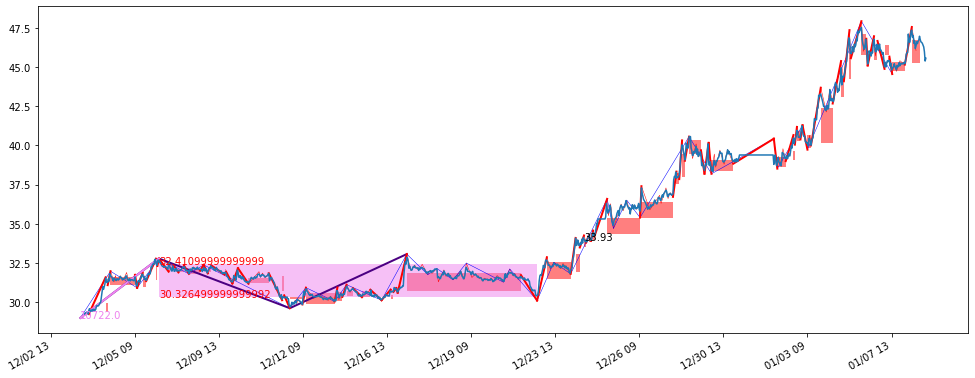

In [69]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

ydata = dt_df.loc[s_stp:e_stp,'close'].values
xdata = dt_df.loc[s_stp:e_stp,'TmIdx'].values
print("s:{0},e:{1},len:{2}".format(s_idx,e_idx,len(ydata)))

# format the ticks
tmLabel = dt_df.loc[s_stp:e_stp,'close'].index
x_fmt = [x.strftime("%m/%d %H") for x in dt_df.index]

def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int(len(ydata)/10)))

Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b')
Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv2_list, linecolor='indigo', lw=2)

pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)
pair_list2 = [pp for pp in m.PLv2_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list2, facecolor='violet',marker=True)
ax.text(11442,33.93,'33.93')
ax.plot(xdata,ydata)
fig.autofmt_xdate()
plt.show()

In [74]:
[st for st in m.Lv3_L if s_idx<st.peak.TmIdx<=13000]

[Trend3(1, 2, Point(9256.0, 23.24, 1)),
 Trend3(-1, 2, Point(12116.0, 50.18, -1))]

In [75]:
[[pp.TmS, pp.drt, pp.ccHL[3],pp.ccHL[2]] for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<11500]

[[10722.0, 1, 30.49000000000001, 29.149],
 [10803.0, 1, 32.322499999999984, 31.0135],
 [11044.0, -1, 30.358000000000004, 30.094],
 [11218.0, 1, 32.07200000000001, 31.896500000000007],
 [11231.0, -1, 31.895000000000007, 31.512500000000003],
 [11422.0, 1, 34.199999999999974, 33.48299999999998]]

In [ ]:
m.Lv0_L[0].start

In [ ]:
pp = m.PLv0_L[4]

In [ ]:
[( (pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]), 
  pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx,
  pp.ccHL[3] - pp.ccHL[2]) 
 for pp in m.PLv0_L[1:5]]

In [ ]:
dt_df.iloc[168].name

In [ ]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[80:220].index
x_idx = dt_df[80:220].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x) -x_idx[0]
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

# get xy data
x = data_up.TmIdx.values
ymin = data_up.open.values
ymax = data_up.close.values
ax.vlines(x, ymin, ymax, color='r', lw=5)
ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
x = data_down.TmIdx.values
ymin = data_down.close.values
ymax = data_down.open.values
ax.vlines(x, ymin, ymax, color='g', lw=5)
ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)

#x = [d[0] for d in dd[:10]]
#y = [d[1] for d in dd[:10]]
#ax.plot(x, y, color='b')


fig.autofmt_xdate()
plt.savefig("image01.png")
#plt.show()

In [ ]:
def candel_plotter(ax, data_df, i, w):
    data = data_df[i-w:i+w]
    data_up = data.query('open <= close')
    data_down = data.query('open > close')
    
    x = data_up.TmIdx.values
    ax.vlines(x, data_up.open.values, data_up.close.values, color='r', lw=5)
    ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
    x = data_down.TmIdx.values
    ax.vlines(x, data_down.close.values, data_down.open.values, color='g', lw=5)
    ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)
    
    #out = ax.plot(data1, data2, **param_dict)
    return None

In [ ]:
i, w = 10000,50
fig, ax = plt.subplots(1, 1,figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].index
x_idx = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x)
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


candel_plotter(ax, dt_df, i, w)
fig.autofmt_xdate()
plt.show()

In [ ]:
x_fmt[18]

In [ ]:
dt_df[500:501].index

In [ ]:
dt_df.loc['2019-11-8 13':'2019-11-11']

In [ ]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [ ]:
pd.core.index

In [ ]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [ ]:
def verity_valley_after_peak(lv_L):
    return True

In [ ]:
verify_end_to_end(m.Lv1_L)

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

### 快照

In [ ]:
tmIdx = 15929


In [ ]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [ ]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

In [ ]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [ ]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [ ]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [ ]:
draw_k(15027,500)

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [ ]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

### draw Pair

In [ ]:
p = find_pair(tmIdx,0)[1]
p.__dict__

In [ ]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [ ]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

In [ ]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

In [ ]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

In [ ]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

In [ ]:
df_p

In [ ]:
df_draw.fillna('', inplace=True)
df_draw

In [ ]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [ ]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [ ]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [ ]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)